#**LAB 6 : Regression**

**Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following :**

1. Fitting of a Line (One Variable and Two Variables)
2. Fitting of a Plane
3. Fitting of M-dimensional hyperplane
4. Practical Example of Regression task

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Fitting of a Line (One Variable)

**Generation of line data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=10$ and $w_{1}=1$ and generate y
3. Plot ($x$,$y$)

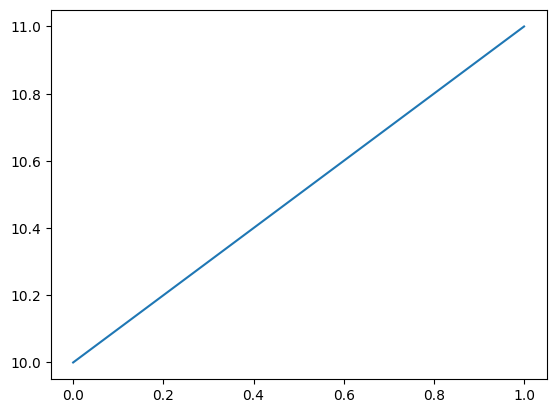

In [6]:
## Write your code here
X  = np.linspace(0,1,1000)
W1 = 1
W0 = 10
Y  = W1*X + W0 
plt.plot(X,Y)

**Corruption of data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1.
3. Plot ($x$,$y_{cor}$) (use scatter plot)

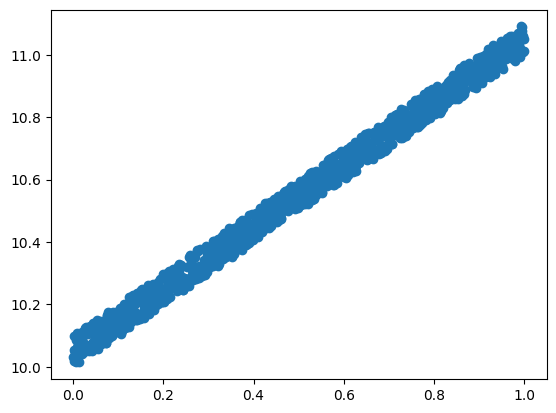

In [7]:
## Write your code here
Random_Noise = np.random.random(Y.shape)

Y_corrupted = Y + 0.1 * Random_Noise

plt.scatter(X,Y_corrupted)

**Heuristically predicting the curve (Generating the Error Curve)**

1. Keep $w_{0}=10$ as constant and find $w_{1}$
2. Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that
3. Find $y_{pred}$ using each value of $w_{1}$
4. The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$
$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$
5. Plot error vs search_$w1$
6. First plot the scatter plot ($x$,$y_{cor}$) , over that plot ($x$,$y_{bestpred}$)

Optimal W1 using heuristic is 1.0780780780780779


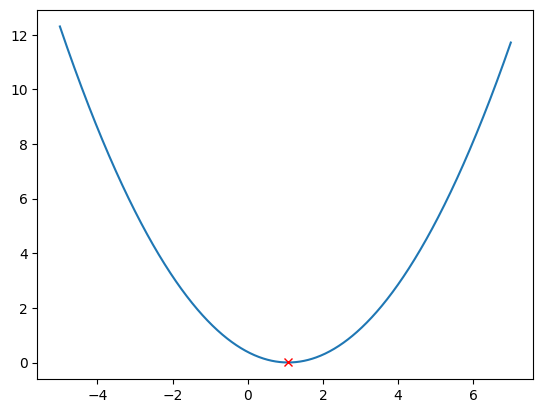

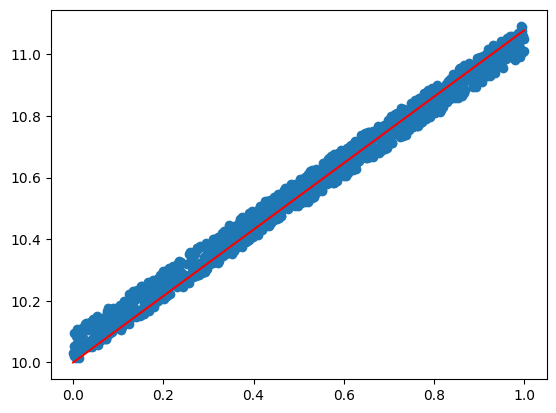

In [36]:


def heuristic_search(X, Y_corrupted):
    search_space_W1 = np.linspace(-5, 7, 1000)
    search_space_W1 = search_space_W1.reshape(search_space_W1.shape[0],1)
    X = X.reshape(X.shape[0], 1)
    Y_Pred = search_space_W1 @ X.T + W0

    Y_corrupted_1000_shape = np.tile(Y_corrupted, (X.shape[0], 1))

    error_in_y = np.mean(np.power((Y_corrupted_1000_shape-Y_Pred),2), axis= 1)

    W1_heuristic = search_space_W1[np.where(error_in_y == np.min(error_in_y))]

    return W1_heuristic, search_space_W1, error_in_y

W1_heuristic, search_space_W1, error_in_y = heuristic_search(X, Y_corrupted)
minimun_index = np.where(error_in_y == np.min(error_in_y))

plt.figure()
plt.plot(search_space_W1, error_in_y)
plt.plot(W1_heuristic, error_in_y[minimun_index], 'x' ,color='r' )

Y_best = W1_heuristic * X + W0
plt.figure()
plt.scatter(X, Y_corrupted)
plt.plot(X, Y_best.T, color='r')

print(f'Optimal W1 using heuristic is {W1_heuristic[0][0]}')


**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

1.0736174242257677


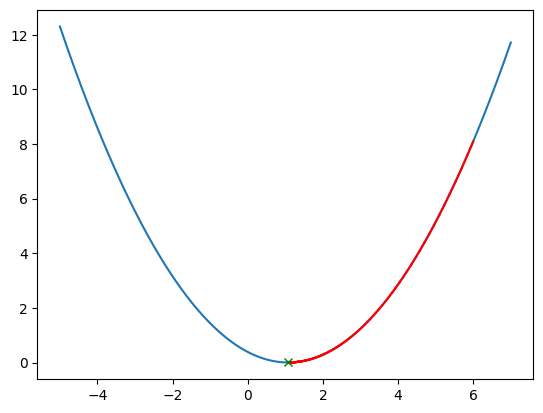

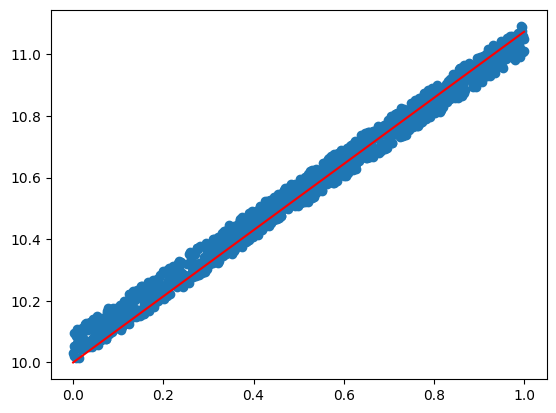

In [43]:
## Write your code here

def make_gradient_step(X, Y, W1, lr ):
    W1_new = W1 - lr * np.average((W1*X+W0 - Y) * X)
    return W1_new

def error(W1, Y):
    return np.mean(np.power(W1*X+W0 - Y, 2))

plt.figure()
plt.plot(search_space_W1,error_in_y)

W1_grad = 6
W0 = 10
lr = 0.1

precision = 1e-10

for i in range(1000):
    W1_prev = W1_grad
    W1_grad = make_gradient_step(X, Y_corrupted, W1_grad, lr)

    plt.plot([W1_prev,W1_grad],[error(W1_prev,Y_corrupted),error(W1_grad,Y_corrupted)],color='r')

    if np.abs(error(W1_grad,Y_corrupted) - error(W1_prev,Y_corrupted)) < precision:
        break

print(W1_grad)
plt.plot(W1_grad,error(W1_grad,Y_corrupted),'x',color='g')

Y_best_grad = W1_grad*X+W0
plt.figure()
plt.scatter(X, Y_corrupted)
plt.plot(X, Y_best_grad, color='r')


#Fitting of a Line (Two Variables)

**Generation of Line Data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=5$ and $w_{1}=1.5$ and generate $y$
3. Plot ($x$,$y$)

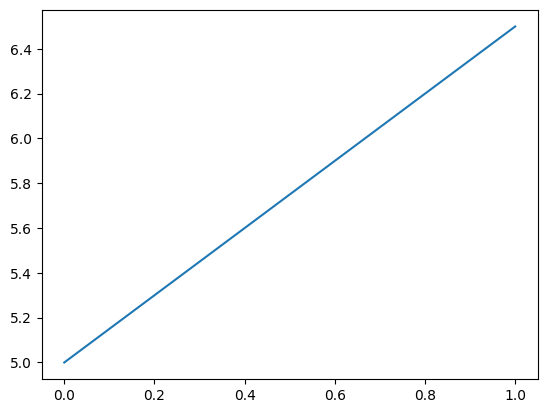

In [44]:
## Write your code here
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0,1,1000)
W0 = 5
W1 = 1.5
Y = W1*X + W0
plt.plot(X,Y)

**Corrupt the data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1
3. Plot ($x$,$y_{cor}$) (use scatter plot)

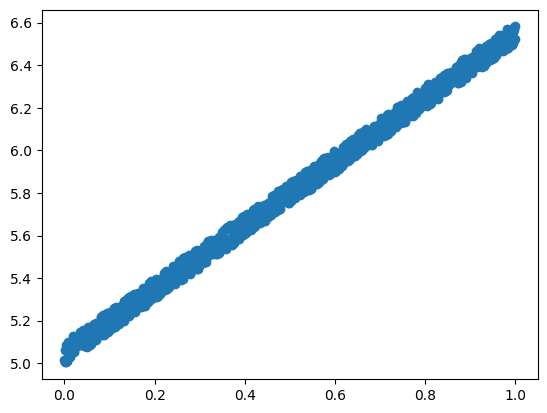

In [45]:
## Write your code here
Random_Noise = np.random.random(Y.shape)

Y_corrupted = Y + 0.1 * Random_Noise

plt.scatter(X,Y_corrupted)

**Plot the Error Surface**

1. we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)
2. Take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface

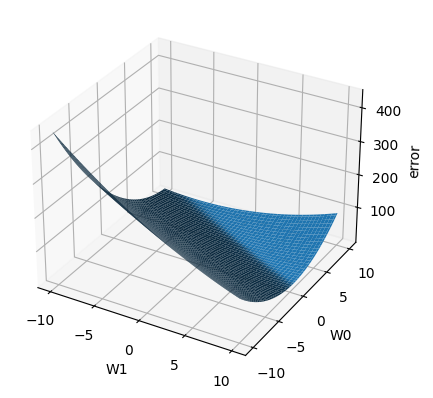

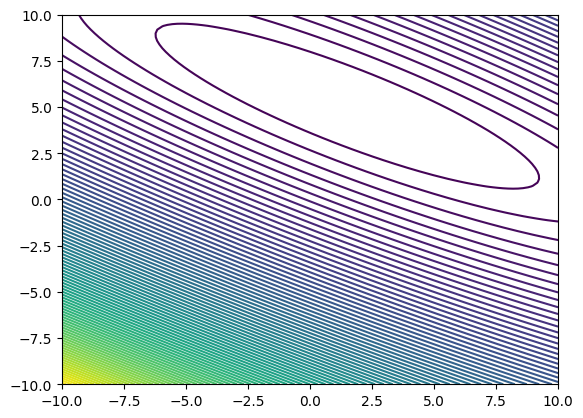

In [54]:
search_space_W1=np.linspace(-10,10,100)
search_space_W0=np.linspace(-10,10,100)

Search_space_W1,Search_space_W0 = np.meshgrid(search_space_W1,search_space_W0)

def error(w1,w0,x,y):
    err=np.zeros(w1.shape)
    for x_i,y_i in zip(x,y):
      err1=np.power((np.tile(y_i,w1.shape)-(w1*x_i+w0)),2)
      err=err+err1
    return err/x.shape[0]

error_with_W1_W0 = error(Search_space_W1,Search_space_W0,X,Y_corrupted)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Search_space_W1, Search_space_W0, error_with_W1_W0)
ax.set_xlabel('W1')
ax.set_ylabel('W0')
ax.set_zlabel('error');

plt.figure()
plt.contour(Search_space_W1, Search_space_W0, error_with_W1_W0,100)

**Gradient Descent to find optimal Values**

5.048242710621524 1.5007734450119137


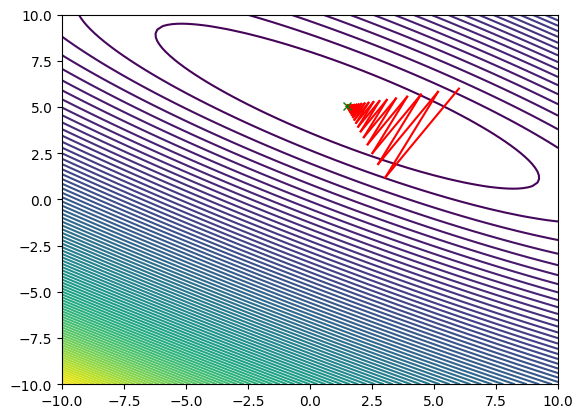

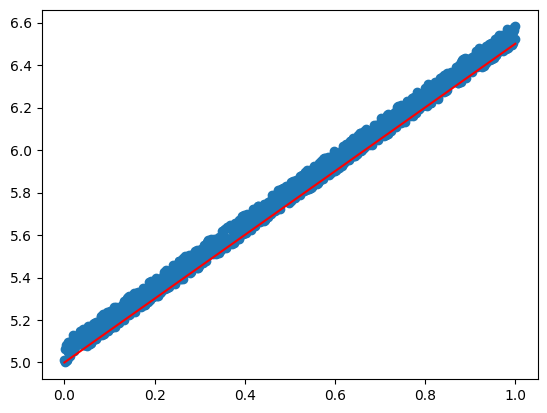

In [69]:
## Write your code here
def make_gradient_step(X, Y, W1, W0, lr ):
    W0_new = W0 - lr * np.average((W1*X+W0 - Y))
    W1_new = W1 - lr * np.average((W1*X+W0 - Y) * X)
    return W0_new, W1_new

def error(w1,w0,x,y):
    return np.mean(np.power(y-(w1*x + w0),2))

plt.figure()
plt.contour(Search_space_W1, Search_space_W0, error_with_W1_W0,100)

W1_grad = 6
W0_grad = 6
lr = 1.5

precision = 1e-10

for i in range(1000):
    W0_prev = W0_grad
    W1_prev = W1_grad
    
    W0_grad, W1_grad = make_gradient_step(X, Y_corrupted, W1_grad, W0_grad,lr)

    plt.plot([W1_prev,W1_grad],[W0_prev, W0_grad],color='r')

    if np.abs(error(W1_grad,W0_grad, X, Y_corrupted) - error(W1_prev,W0_prev, X, Y_corrupted)) < precision:
        break

print(W0_grad,W1_grad)
plt.plot(W1_grad,W0_grad,'x',color='g')

Y_best_grad = W1_grad*X+W0
plt.figure()
plt.scatter(X, Y_corrupted)
plt.plot(X, Y_best_grad, color='r')

#Fitting of a Plane

**Generation of plane data**

1. Generate $x_{1}$ and $x_{2}$ from range -1 to 1, (30 samples)
2. Equation of plane $y=w_{0}+w_{1}x_{1}+w_{2}x_{2}$
3. Here we will fix $w_{0}$ and will learn $w_{1}$ and $w_{2}$

(900,)


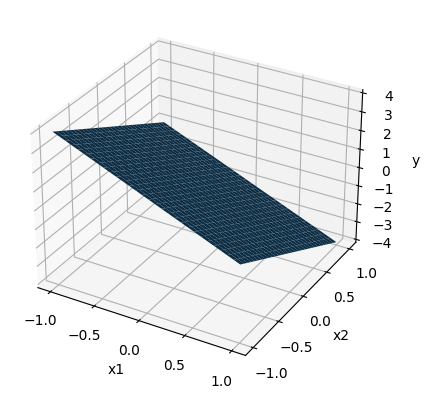

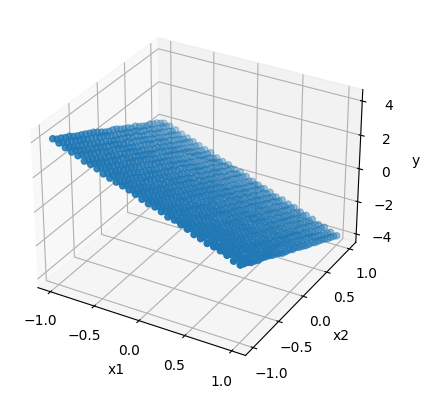

In [70]:

X1=np.linspace(-1,1,30)
X2=np.linspace(-1,1,30)



W0=0
W1=-2
W2=-2

y= W0+W1*X1+W2*X2


X1,X2=np.meshgrid(X1,X2)
Y=W0+W1*X1+W2*X2


plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');



Random_Noise=np.random.uniform(0,1,Y.shape)
Y_corrupted =Y+0.1*Random_Noise

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y_corrupted,'.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');


x1=X1.flatten()
x2=X2.flatten()
y_cor=Y_corrupted.flatten()

print(x1.shape)

**Generate the Error Surface**

1. Vary $w_{1}$ and $w_{2}$ and generate the error surface and find their optimal value 
2. Also plot the Contour

Text(0, 0.5, 'w1')

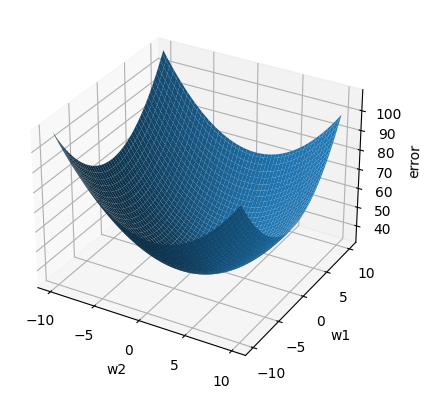

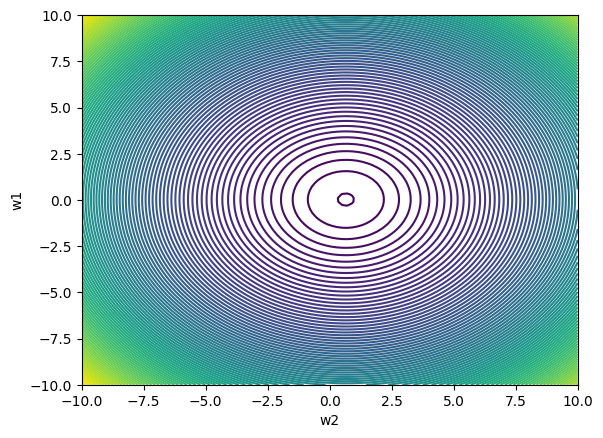

In [73]:

search_space_w2=np.linspace(-10,10,100)
search_space_w1=np.linspace(-10,10,100)

Search_space_W2,Search_space_W1=np.meshgrid(search_space_w2,search_space_w1)


def error(w2,w1,w0,x1,x2,y):
    err=np.zeros(w1.shape)
    for x1_i,x2_i,y_i in zip(x1,x2,y):
      err1=np.power((np.tile(y_i,w1.shape)-(w0+w1*x1_i+w2*x2_i)),2)
      err=err+err1
    return err/x1.shape[0]

err=error(Search_space_W2,Search_space_W1, W0,x1,x2,Y_corrupted)


plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Search_space_W2,Search_space_W1,err)
ax.set_xlabel('w2')
ax.set_ylabel('w1')
ax.set_zlabel('error');

plt.figure()
plt.contour(Search_space_W2, Search_space_W1, err,100)
plt.xlabel('w2')
plt.ylabel('w1')

**Prediction using Gradient Descent**

-1.999964875449235 -1.999964875449235


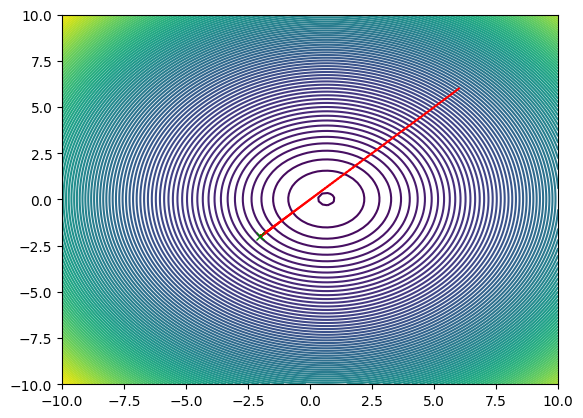

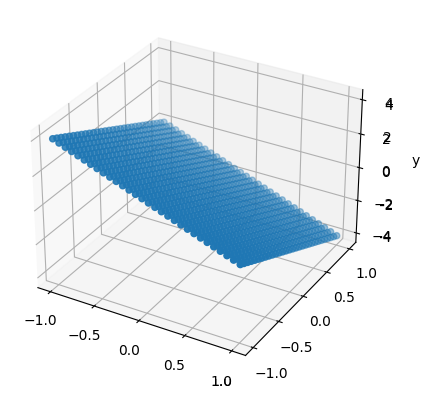

In [97]:

w2_grad = 6 
w1_grad = 6
lr = 0.1
precision = 1e-10


def make_gradient_step(X1, X2, Y, W1, W2, W0, lr ):
    W2_new = W2 - lr * np.average((W2*X2+W1*X1+W0 - Y) * X2)
    W1_new = W1 - lr * np.average((W2*X2+W1*X1+W0 - Y) * X1)
    return W2_new, W1_new

def error(w2,w1,w0,x1,x2,y):
    return np.mean(np.power(y-(w2*x2+w1*x1+w0),2))

plt.figure()
plt.contour(Search_space_W2, Search_space_W1, err,100)



for i in range(10000):
    w2_old = w2_grad       
    w1_old = w1_grad
    w2_grad, w1_grad = make_gradient_step(X1,X2,Y, w1_old, w2_old, W0, lr)
    
    plt.plot([w2_old,w2_grad],[w1_old,w1_grad],color='r')
    
    if np.abs(error(w2_grad,w1_grad,W0,x1,x2,y_cor) - error(w2_old,w1_old,W0,x1,x2,y_cor)) < precision:
        break

print(w2_grad, w1_grad)
plt.plot(w2_grad,w1_grad,'x',color='g')



plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y_cor,'.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

y_bestpred=W0+w1_grad*x1+w2_grad*x2

ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y_bestpred,'.')

#Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)


Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

1. Create a class named Regression
2. Inside the class, include constructor, and the following functions:

    a. grad_update: Takes input as previous weight, learning rate, x, y and returns the updated weight.

    b. error: Takes input as weight, learning rate, x, y and returns the mean squared error.
    
    c. mat_inv: This returns the pseudo inverse of train data which is multiplied by labels.

    d. Regression_grad_des: Here, inside the for loop, write a code to update the weights. Also calulate error after each update of weights and store them in a list. Next, calculate the deviation in error with new_weights and old_weights and break the loop, if it's below a threshold value mentioned the code.

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
[[1.05050297]
 [1.99847755]
 [3.00224774]
 [3.9979014 ]
 [5.00131085]
 [6.00061041]]
[[1.05597673]
 [1.93466829]
 [2.8884211 ]
 [3.89944939]
 [4.78960713]
 [5.81545119]]


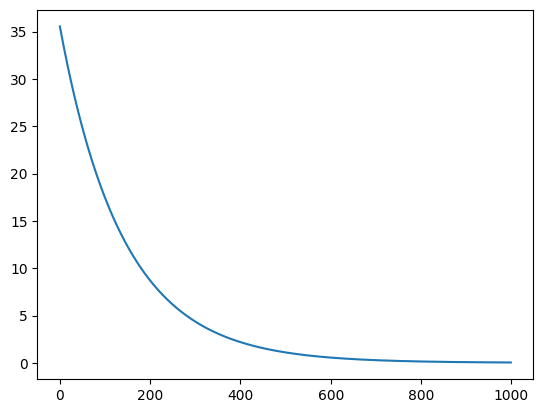

In [98]:
import numpy as np
import matplotlib.pyplot as plt

class regression:
  
  def __init__(self, name='reg'):
    self.name = name  

  def grad_update(self,w_old,lr,y,x):
    w=w_old-(1/x.shape[1])*lr*(x @ ((x.T @ w_old)-y))
    return w

  def error(self,w,y,x):
    return np.mean(np.power((y-x.T @ w),2))

  def mat_inv(self,y,x_aug):
    return np.linalg.pinv((x_aug @ x_aug.T)) @ x_aug @ y
    
  def Regression_grad_des(self,x,y,lr):
    err=[]
    w_init=np.random.uniform(-1,1,(x_aug.shape[0],1))
    w_old=w_init
    w_pred=self.grad_update(w_old,lr,y,x_aug)
    for i in range(1000):
      w_old=w_pred
      w_pred=self.grad_update(w_old,lr,y,x_aug)
  
      err.append(self.error(w_pred,y,x_aug))
      dev=np.abs(self.error(w_pred,y,x_aug)-self.error(w_old,y,x_aug))
          
      if dev<=1e-4:
        break

    return w_pred,err


sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

w=np.array([[1],[2],[3],[4],[5],[6]]) 
print(w.shape)



x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)


y=x_aug.T @ w  
print(y.shape)



noise=np.random.uniform(0,1,y.shape)
y=y+0.1*noise


reg=regression()
w_opt=reg.mat_inv(y,x_aug)
print(w_opt)


lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred)

plt.plot(err)

#Practical Example (Salary Prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)
4. Find the mean square error in test.
5. Also find the optimal weight values using regression class from the Sci-kit learn library

In [112]:
import csv
f = open('/home/abhishekj/labs/EE_413_LAB/Lab_5/salary_pred_data.csv')

data_frm_csv = csv.reader(f)

All_rows = []

for row in data_frm_csv:
    All_rows.append(row)

Rows = All_rows[1:]

print(Rows[0])

X = np.zeros((len(Rows), len(Rows[0])))

for i in range(len(X)):
    X[i,:]  = Rows[i]

X = X.T

train_data=X[:,0:900]
test_data=X[:,900:]

x_train=train_data[0:5,:]
y_train=train_data[5,:]
y_train=y_train.T
y_train=y_train[:,np.newaxis]

x_test=test_data[0:5,:]
y_test=test_data[5,:]
y_test=y_test.T
y_test=y_test[:,np.newaxis]

x_train=np.concatenate((np.ones((1,x_train.shape[1])), x_train),axis=0)

reg=regression()

w_pred=reg.mat_inv(y_train,x_train)

error=reg.error(w_pred,y_train,x_train)/((np.max(y_train)-np.mean(y_train))**2)

print(f'Normalized training error= {error}')

XX = np.concatenate((np.ones((1,x_test.shape[1])), x_test),axis=0)

y_pred = XX.T @ w_pred

error=reg.error(w_pred,y_test,XX)/((np.max(y_test)-np.mean(y_test))**2)

print(f'Error is {error}')
print(f'Pred Salary is {y_pred[0:5]}')
print(f'actual salary is {y_test[0:5]}')

['2', '11', '34', '4', '3', '41368']
Normalized training error= 1.127485750874925e-26
Error is 1.8666508234569391e-26
Pred Salary is [[33184.]
 [52740.]
 [58152.]
 [44292.]
 [50184.]]
actual salary is [[33184.]
 [52740.]
 [58152.]
 [44292.]
 [50184.]]


In [113]:
import numpy as np
from sklearn.linear_model import LinearRegression
print(x_train)
print(y_train.shape)

[[ 1.  1.  1. ...  1.  1.  1.]
 [ 2.  4.  1. ...  2.  2.  3.]
 [11. 14. 13. ...  3.  3.  9.]
 [34. 28. 55. ... 56. 57. 59.]
 [ 4.  1.  3. ...  2.  2.  1.]
 [ 3.  4.  2. ...  2.  6.  3.]]
(900, 1)


[[0.e+00 2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]]


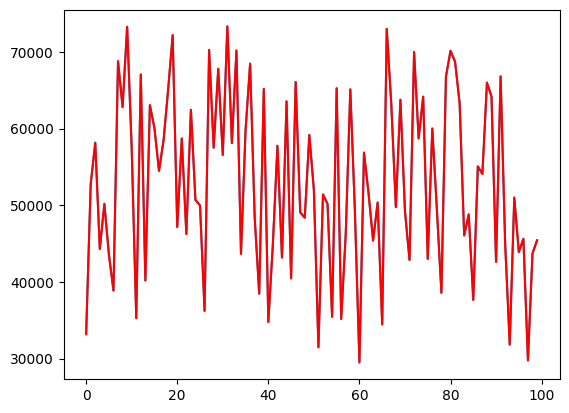

In [115]:
scikit_regression = LinearRegression()

scikit_regression.fit(x_train.T, y_train)

W = scikit_regression.coef_
print(W)

y_pred = scikit_regression.predict((np.concatenate((np.ones((1,x_test.shape[1])), x_test),axis=0)).T)

plt.plot(y_test)
plt.plot(y_pred, 'r')